# The Battle of Neighborhoods

### The Rise of The Third Wave Coffee Movement: Coffee Shops in Portland vs Hillsboro

### Introduction

##### Oregon is the most geographically diverse state in the U.S., surrounded by volcanoes, bodies of water, mixed forests, high deserts and semi-arid shrublands. The largest contributor of its economy from agriculture, fishing, timbers, and hydroelectric power. Moreover, technology has started to become one of its major economic forces in the 21st century, or more known as “Silicon Forest” establishment with the expansion of Tektronix, Intel, and Nike. This high tech cluster industries are located in Portland Metropolitan Area that includes Hillsboro. On top of that, due to its beautiful and family friendly sites that can be visited over the weekend, Oregon has attracted so many talents from all over the world to establish their life in this state. 

##### Coffee has been one of the hottest commodity in the world. In the US itself, people consume 400 million cups of coffee per day making the US the leading consumer of coffee in the world. Nowadays, people are consuming coffee not only just for the sake of their daily caffeine intake, but also for the enjoyment and appreciation of so called high quality and specialty coffee – or so called as the third wave coffee movement. In March 2008, Jonathan Gold coined this term by saying: The first wave of American coffee culture was probably the 19th century surge that put Folgers on every table, and the second was the proliferation, starting in the 1960s at Peet’s and moving smartly through the Starbucks grande decaf latte…We are now in the third wave of coffee connoisseurship, where beans are sourced from farms instead of countries, roasting is about bringing out rather than incinerating the unique characteristics of each bean, and the flavor is clean and hard and pure.



### Objective

##### Comparing Portland’s coffee culture to other major cities along the West Coast, Oliver Strand wrote: “Seattle coffee might have more muscle, and San Francisco coffee might have more mystique, but Portland’s coffee scene is arguably the country’s most intimate. It’s also one of the most relaxed.” This capstone project will analyze coffee shops in Portland as one of the main venues and estimate the potential new upcoming location from the map. The median household income will also be provided to emphasize people still have disposable income to consume the expensive but high quality third wave coffee. Furthermore, an analysis on coffee shops in Hillsboro will also be provided as an alternative to coffee shops in Portland, which can be a potential attractive opportunity for investors.



### Data

##### For this project, two data will be needed: 1) data of median household income in Portland and Hillsboro, 2) and data of venues in Portland and Hillsboro. The data of median household income in Portland and Hillsboro will be obtained from datausa.io/profile/geo. The data of venues in Portland and Hillsboro will be obtained from Foursquare API.



### Methodology

##### 1) Raw income data collection from datausa.io/profile/geo and processed using excel file to obtain the median household income.
##### 2) Venues location from Foursquare API and rank them based on the venues count.
##### 3) Map visualization using Folium to estimate the next potential location for opening up a new location

## Importing Libraries

In [19]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('Libraries imported')

Libraries imported


In [20]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

print('Folium installed')

Folium installed


In [21]:
from bs4 import BeautifulSoup
import requests
import lxml

## Foursquare API

In [22]:
CLIENT_ID = '2WZOVJUGDAVZSYRCTIOKGHLEJV45MXA0LGVDB42INTSMZ3E3' # your Foursquare ID
CLIENT_SECRET = 'Q3PYLDW02BDZ2Y1W3AVHNCUQA1SKCKCN0GXEGW2XRJ4TGGQT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [23]:
print ('Your Credentials:')
print ('Client_ID: '+ CLIENT_ID)
print ('Client_Secret: '+ CLIENT_SECRET)

Your Credentials:
Client_ID: 2WZOVJUGDAVZSYRCTIOKGHLEJV45MXA0LGVDB42INTSMZ3E3
Client_Secret: Q3PYLDW02BDZ2Y1W3AVHNCUQA1SKCKCN0GXEGW2XRJ4TGGQT


## Median Household Income in Portland, OR

In [25]:
portland_income = pd.read_excel('Median_Household_Income_Portland.xlsx')
portland_income.head()

,Year,Median_Income,Area
0,2018,73097,Portland
1,2017,66187,Portland
2,2016,62629,Portland
3,2015,60892,Portland
4,2014,54624,Portland


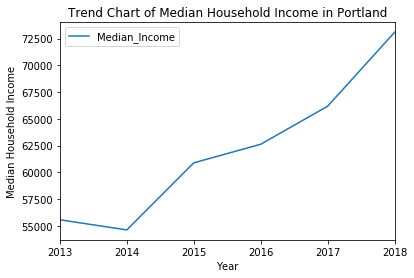

In [31]:
portland_income.plot.line('Year', 'Median_Income')
plt.title('Trend Chart of Median Household Income in Portland')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend()
plt.show()

## Coffee Shops in Portland, OR

In [32]:
address = 'Portland, OR'

geolocator = Nominatim(user_agent = "to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of Portland are {},{}.'.format(latitude,longitude))

The geographical coordinate of Portland are 45.5202471,-122.6741949.


In [33]:
LIMIT = 100 

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,  
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2WZOVJUGDAVZSYRCTIOKGHLEJV45MXA0LGVDB42INTSMZ3E3&client_secret=Q3PYLDW02BDZ2Y1W3AVHNCUQA1SKCKCN0GXEGW2XRJ4TGGQT&v=20180605&ll=45.5202471,-122.6741949&radius=1000&limit=100'

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4abfa7d7237d7d565005a9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Portland',
  'headerFullLocation': 'Downtown Portland, Portland',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 237,
  'suggestedBounds': {'ne': {'lat': 45.52924710900001,
    'lng': -122.66137378676812},
   'sw': {'lat': 45.51124709099999, 'lng': -122.68701601323188}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '42829c80f964a52056221fe3',
       'name': 'Stumptown Coffee Roasters',
       'location': {'address': '128 SW 3rd Ave',
        'crossStreet': 'btwn SW Ash & SW Pine St',
        'lat': 45.5

In [35]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Stumptown Coffee Roasters,Coffee Shop,45.521787,-122.673517
1,"The Hi-Lo, Autograph Collection",Hotel,45.520349,-122.675134
2,Portland Burger,Burger Joint,45.520389,-122.673087
3,Kingsland Kitchen,Sandwich Place,45.521770,-122.673870
4,Pine Street Market,Food Court,45.521421,-122.672494


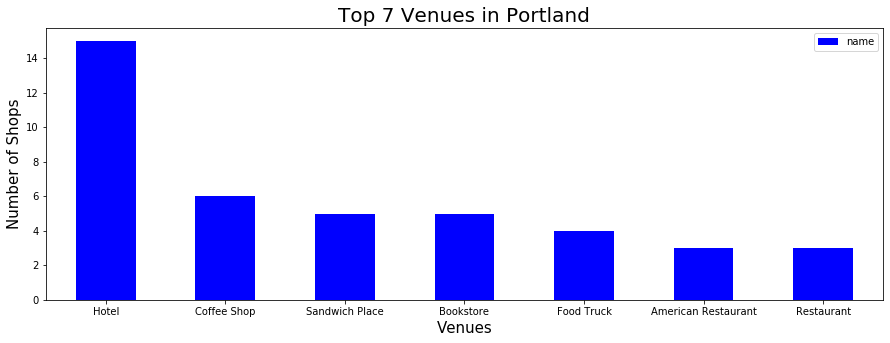

In [37]:
top7 = nearby_venues.groupby('categories')['name'].count().sort_values(ascending=False).head(7)
top7.plot.bar(figsize=(15,5), color='blue')
plt.title('Top 7 Venues in Portland', fontsize=20)
plt.xlabel('Venues', fontsize=15)
plt.ylabel('Number of Shops', fontsize=15)
plt.xticks(rotation ='horizontal')
plt.legend()
plt.show()

In [38]:
portland_coffee = nearby_venues[nearby_venues['categories']== 'Coffee Shop'].reset_index(drop=True)
print('{} coffee shops were returned by Foursquare.'.format(portland_coffee.shape[0]))
portland_coffee

6 coffee shops were returned by Foursquare.


,name,categories,lat,lng
0,Stumptown Coffee Roasters,Coffee Shop,45.521787,-122.673517
1,Barista,Coffee Shop,45.519179,-122.675083
2,Water Avenue Coffee Company,Coffee Shop,45.518169,-122.679154
3,40 LBS Coffee Bar,Coffee Shop,45.516954,-122.674894
4,Stumptown Coffee Roasters,Coffee Shop,45.522213,-122.681752
5,Cafe Ponte,Coffee Shop,45.517033,-122.672930


In [39]:
portland_map = folium.Map(location=[latitude,longitude], zoom_start=15)

def add_markers(portland_coffee):
    for lat,lng in zip(portland_coffee.lat, portland_coffee.lng):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, color='red',
            fill=True, fill_color='#3186cc', fill_opacity=0.7,
            parse_html=False).add_to(portland_map)

add_markers(portland_coffee)
heatmap = portland_coffee[["lat",'lng']].to_numpy().tolist()
portland_map.add_child(plugins.HeatMap(heatmap))

portland_map

## Median Household Income in Hillsboro, OR

In [42]:
hillsboro_income = pd.read_excel('Median_Household_Income_Hillsboro.xlsx')
hillsboro_income.head()

,Year,Median_Income,Area
0,2017,74686.0,Hillsboro
1,2016,69961.5,Hillsboro
2,2015,67255.5,Hillsboro
3,2014,65922.0,Hillsboro
4,2013,64462.0,Hillsboro


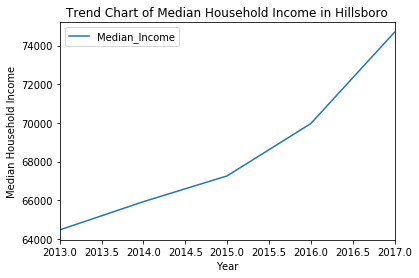

In [43]:
hillsboro_income.plot.line('Year', 'Median_Income')
plt.title('Trend Chart of Median Household Income in Hillsboro')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend()
plt.show()

## Coffee Shops in Hillsboro, OR

In [44]:
address2 = 'Hillsboro, OR'

geolocator2 = Nominatim(user_agent = "to_explorer")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude

print('The geographical coordinate of Hillsboro are {},{}.'.format(latitude2,longitude2))

The geographical coordinate of Hillsboro are 45.5228939,-122.989827.


In [45]:
LIMIT2 = 100 

radius2 = 1000

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2,  
    longitude2, 
    radius2, 
    LIMIT2)
url2

'https://api.foursquare.com/v2/venues/explore?&client_id=2WZOVJUGDAVZSYRCTIOKGHLEJV45MXA0LGVDB42INTSMZ3E3&client_secret=Q3PYLDW02BDZ2Y1W3AVHNCUQA1SKCKCN0GXEGW2XRJ4TGGQT&v=20180605&ll=45.5228939,-122.989827&radius=1000&limit=100'

In [46]:
results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5f4abeda3732647dc6c5a08b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Hillsboro',
  'headerFullLocation': 'Downtown Hillsboro, Hillsboro',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 41,
  'suggestedBounds': {'ne': {'lat': 45.53189390900001,
    'lng': -122.97700528359532},
   'sw': {'lat': 45.51389389099999, 'lng': -123.00264871640469}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a8a0d94f964a520c40920e3',
       'name': 'Syun Izakaya Japanese Restaurant & Sake Club',
       'location': {'address': '209 NE Lincoln St',
        'lat': 45.524033,
        'lng': -122.

In [47]:
def get_category_type(row2):
    try:
        categories_list2 = row2['categories']
    except:
        categories_list2 = row2['venue.categories']
        
    if len(categories_list2) == 0:
        return None
    else:
        return categories_list2[0]['name']

In [48]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,Syun Izakaya Japanese Restaurant & Sake Club,Japanese Restaurant,45.524033,-122.987887
1,Hillsboro Farmer's Market,Farmers Market,45.522683,-122.988433
2,Manaia Coffee House and Grill,Restaurant,45.522835,-122.987901
3,McNally's Taproom,Beer Garden,45.522519,-122.984908
4,Clark's Bistro,Sandwich Place,45.522318,-122.986617


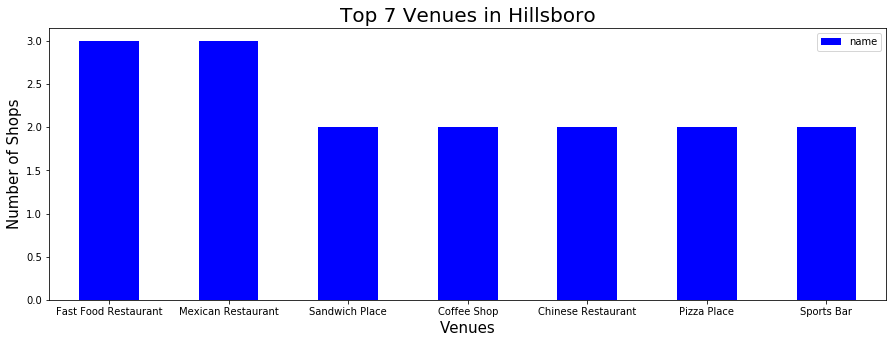

In [49]:
top7_H = nearby_venues2.groupby('categories')['name'].count().sort_values(ascending=False).head(7)
top7_H.plot.bar(figsize=(15,5), color='blue')
plt.title('Top 7 Venues in Hillsboro', fontsize=20)
plt.xlabel('Venues', fontsize=15)
plt.ylabel('Number of Shops', fontsize=15)
plt.xticks(rotation ='horizontal')
plt.legend()
plt.show()

In [50]:
hillsboro_coffee = nearby_venues2[nearby_venues2['categories']== 'Coffee Shop'].reset_index(drop=True)
print('{} coffee shops were returned by Foursquare.'.format(hillsboro_coffee.shape[0]))
hillsboro_coffee

2 coffee shops were returned by Foursquare.


,name,categories,lat,lng
0,Insomnia Coffee Company,Coffee Shop,45.522744,-122.985797
1,Starbucks,Coffee Shop,45.522514,-122.989250


In [51]:
hillsboro_map = folium.Map(location=[latitude2,longitude2], zoom_start=15)

def add_markers(hillsboro_coffee):
    for lat,lng in zip(hillsboro_coffee.lat, hillsboro_coffee.lng):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, color='red',
            fill=True, fill_color='#3186cc', fill_opacity=0.7,
            parse_html=False).add_to(hillsboro_map)

add_markers(hillsboro_coffee)
heatmap2 = hillsboro_coffee[["lat",'lng']].to_numpy().tolist()
hillsboro_map.add_child(plugins.HeatMap(heatmap2))

hillsboro_map

### Results
#### 1) The median household income in Portland is 73,0977 USD
#### 2) According to Foursquare, there are 6 coffee shops in Portland. It is the second largest venue.
#### 3) The median household income in Hillsboro is 75,599 USD
#### 4) According to Foursquare, there are 2 coffee shops in Hillsboro. It is the third largest venue, in tie with several other venues.

### Conclusion
#### Portland has more concentrated venues in one place where family or individual can enjoy the city vibrant and sightseeing around the area. A third wave coffee shop is an attractive investment for this type of environment, where people can hangout and enjoy the relaxing afternoon. From the map, the next new location of a coffee shop in Portland can be chosen and presented to the investors or stakeholders. The suggestion is somewhere that is not too close to other coffee shops to avoid swinging the decision of potential customers on the spot, which is located somewhere around 'Old Town' and 'Northwest Davis Street' area. It is also a good idea to open a new coffee shop around the 'Burnside Bridge' to enjoy the sightseeing. This could also be a favorite spot for cyclist and jogger to hang out after a relaxing stroll.
#### Hillsboro presents an attractive opportunity to open a new third wave coffee shop. The median household income is higher than that in Portland which could potentially mean that more people that have disposable income and can afford a third wave coffee movement lifestyle. Although, the data is not presented in this notebook, since Hillsboro is such a small city, the real estate cost is much cheaper than Portland, thus less cost for initial seed of investment. The place is not overwhelmed with coffee shops and has less competitor. A new coffee shop in this city will also save driving time for the people that live in this city travelling to Portland just to enjoy a cup of specialty coffee.